In [1]:
"""

Source: https://www.youtube.com/watch?v=6-dusZtK5gI&ab_channel=Gidahatari
https://youtu.be/6-dusZtK5gI

"""

import fiona
from shapely.geometry import Polygon, mapping
import matplotlib.pyplot as plt
from descartes import PolygonPatch


In [2]:

#open clip layer
aoi = fiona.open('/home/nicole/Downloads/shp-coast/GSHHS_shp/f/GSHHS_f_L1.shp')
aoiGeom = Polygon(aoi[0]['geometry']['coordinates'][0])

In [3]:

#open polygon and create list of polygons
polyShp = fiona.open('/home/nicole/Downloads/shp-coast/GSHHS_shp/f/GSHHS_f_L1.shp')
polyList=[]
polyProperties=[]
for poly in polyShp:
        polyGeom = Polygon(poly['geometry']['coordinates'][0])
        polyList.append(polyGeom)
        polyProperties.append(poly['properties'])
print(polyList)
print(  polyProperties)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/home/nicole/miniconda3/envs/shapefile_cut/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


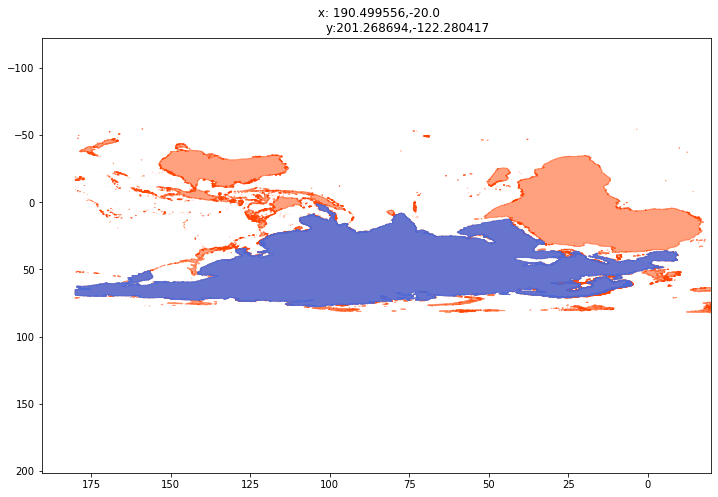

In [4]:
fig,ax = plt.subplots(figsize=(12,8))

for poly in polyList:
        polyPatch = PolygonPatch(poly,alpha=0.5,color='orangered')
        ax.add_patch(polyPatch)
clipPatch = PolygonPatch(aoiGeom,alpha=0.8,color='royalblue')
ax.add_patch(clipPatch)
outline=-200
ax.set_xlim(aoiGeom.bounds[0]-outline,aoiGeom.bounds[2]+outline)
ax.set_ylim(aoiGeom.bounds[1]-outline,aoiGeom.bounds[3]+outline)
plt.title(f""" x: {aoiGeom.bounds[0]-outline},{aoiGeom.bounds[2]+outline}
                y:{aoiGeom.bounds[1]-outline},{aoiGeom.bounds[3]+outline}""")

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

for poly in polyList:
        polyPatch = PolygonPatch(poly,alpha=0.5,color='orangered')
        ax.add_patch(polyPatch)
clipPatch = PolygonPatch(aoiGeom,alpha=0.8,color='royalblue')
ax.add_patch(clipPatch)

ax.set_xlim([-48.8, -48.1])
ax.set_ylim([-25.80, -25.])
plt.title(f""" x: -48.8, -48.1
                y:-25.80, -25.""")

/home/nicole/miniconda3/envs/shapefile_cut/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


In [ ]:
#clip polygons to clip layer
clipPolyList=[]
clipPolyProperties=[]
for index, poly in enumerate(polyList):
    result = aoiGeom.intersection(poly)
    if result.area:
        clipPolyList.append(result)
        clipPolyProperties.append(polyProperties[index])
print(clipPolyList[0])
print(clipPolyProperties[0]) 

In [ ]:
#plot clipped polygon and clip Layer
fig,ax = plt.subplots(figsize=(12,8))
for poly in clipPolyList:
    polyPatch = PolygonPatch(poly,alpha=0.5,color='orangered')
    ax.add_patch(polyPatch)
clipPatch = PolygonPatch(aoiGeom,alpha=0.8,color='royalblue')
ax.add_patch(clipPatch)

ax.set_xlim([-49.0, -48.])
ax.set_ylim([-25.80, -25.])
plt.title(f""" x: -49.0, -48.0
                y:-25.80, -25.""")

In [ ]:
#export clipped polygons as shapefile
scheme = polyShp.schema #tipo do schape, se é ponto, poligono, linha

outFile = fiona.open('./shorelineNOAA_GSHHG_cutPR.shp', mode = 'w',
                    driver = "ESRI Shapefile", schema = scheme)
for index, poly in enumerate(clipPolyList):
    outFile.write({
        'geometry':mapping(poly),
                          'properties':clipPolyProperties[index]
    })